In [277]:
import pandas as pd

file_path = '/Users/rolanddelarosa/Desktop/THESIS VERSION 2/Cleaned Files 1/AgeFiltered_CleanedData.csv'

# Read just the header to get the column names
header = pd.read_csv(file_path, nrows=0)
col_names = header.columns

# Now use the column names at index 17 and 18
dtype_dict = {col_names[17]: str, col_names[18]: str}

# Now read the CSV with the dtype_dict applied
df = pd.read_csv(file_path, dtype=dtype_dict)

df.head()

,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Child_Marital_Status,Parent_Educational_Attainment,Child_Educational_Attainment,Parent_Schooling_Years,Child_Schooling_Years,Parent_Primary_Occupation,Child_Primary_Occupation,Parent_WagePerDay,Child_WagePerDay,Child_Birth_Cohort
0,4,2016,2,2/2/16,1,2,2,1,1,51,...,1,5,9,10,14,1,NaN,,,1990
1,4,2016,2,2/2/16,1,2,2,2,1,51,...,1,9,9,14,14,NaN,NaN,,,1990
2,5,2016,2,2/3/16,1,2,1,1,1,71,...,1,2,9,4,14,9,1,350,909,1989
3,5,2016,2,2/3/16,1,2,1,2,1,54,...,1,2,9,2,14,9,1,200,909,1989
4,10,2016,2,2/5/16,1,2,1,1,1,72,...,4,3,5,6,10,6,1,,,1977


<span style="font-family:monospace; font-size:15px;"><b>Age Cleaning and Adding Log Incomes</b></span>


- Child Age (25-45)
- Parent Age (45-64)
- Natural Logarithmic of the Incomes
- Adding the Birth_Cohort Groups
- Filtering missing data of income (both parent & child)

In [281]:
import pandas as pd
import numpy as np

# Ensure numeric types
df['Parent_Age'] = pd.to_numeric(df['Parent_Age'], errors='coerce')
df['Child_Age'] = pd.to_numeric(df['Child_Age'], errors='coerce')
df['Parent_WagePerDay'] = pd.to_numeric(df['Parent_WagePerDay'], errors='coerce')
df['Child_WagePerDay'] = pd.to_numeric(df['Child_WagePerDay'], errors='coerce')

# Filter by age
filtered_df = df[(df['Parent_Age'] >= 45) & (df['Parent_Age'] <= 64) &
                 (df['Child_Age'] >= 25) & (df['Child_Age'] <= 45)].copy()

# Apply log (avoid log(0))
filtered_df['Parent_LogIncome'] = np.log(filtered_df['Parent_WagePerDay'].replace(0, np.nan))
filtered_df['Child_LogIncome'] = np.log(filtered_df['Child_WagePerDay'].replace(0, np.nan))

# Remove rows where either Parent or Child log income is missing
filtered_df = filtered_df.dropna(subset=['Parent_LogIncome', 'Child_LogIncome'])

# Define bins and labels for 5-year cohorts from 1970-1974 to 2000-2004
bins = [1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]
labels = [
    '1970-1974',
    '1975-1979',
    '1980-1984',
    '1985-1989',
    '1990-1994',
    '1995-1999',
    '2000-2004'
]

# Assign cohorts to the filtered_df
filtered_df['Birth_Cohort'] = pd.cut(
    filtered_df['Child_Birth_Cohort'],
    bins=bins,
    labels=labels,
    right=False,          # left-inclusive: 1970 <= x < 1975 => '1970-1974'
    include_lowest=True
)

# Create descriptive frequency table for the filtered data
freq_table = filtered_df['Birth_Cohort'].value_counts(dropna=False).sort_index()
percent_table = filtered_df['Birth_Cohort'].value_counts(normalize=True, dropna=False).sort_index() * 100

descriptive_freq = pd.DataFrame({
    'Frequency': freq_table,
    'Percentage': percent_table.round(2)
})

print(descriptive_freq)
filtered_df.head()

              Frequency  Percentage
Birth_Cohort                       
1970-1974            48        0.06
1975-1979           722        0.96
1980-1984          4161        5.51
1985-1989         15136       20.05
1990-1994         34187       45.28
1995-1999         21246       28.14
2000-2004             0        0.00


,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Parent_Schooling_Years,Child_Schooling_Years,Parent_Primary_Occupation,Child_Primary_Occupation,Parent_WagePerDay,Child_WagePerDay,Child_Birth_Cohort,Parent_LogIncome,Child_LogIncome,Birth_Cohort
3,5,2016,2,2/3/16,1,2,1,2,1,54,...,2,14,9,1,200.0,909.0,1989,5.298317,6.812345,1985-1989
17,45,2016,2,2/14/16,1,2,2,1,1,54,...,3,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
18,45,2016,2,2/14/16,1,2,2,2,1,54,...,6,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
27,59,2016,2,2/19/16,1,2,2,2,2,46,...,10,12,9,5,200.0,300.0,1988,5.298317,5.703782,1985-1989
35,63,2016,2,2/21/16,1,2,2,2,1,58,...,12,14,5,5,454.0,423.0,1982,6.118097,6.047372,1980-1984


In [285]:
import pandas as pd
import numpy as np

# --- Region and sex code mapping ---
region_map = {
    13: 'NCR', 14: 'CAR', 1: 'Region I', 2: 'Region II', 3: 'Region III', 4: 'Region IV-A',
    17: 'MIMAROPA', 5: 'Region V', 6: 'Region VI', 7: 'Region VII', 8: 'Region VIII',
    9: 'Region IX', 10: 'Region X', 11: 'Region XI', 12: 'Region XII', 16: 'Region XIII', 15: 'ARMM'
}
parent_sex_map = {1: 'Father', 2: 'Mother'}
child_sex_map = {1: 'Son', 2: 'Daughter'}

# --- Data cleaning: remove rows with missing parent/child income ---
# Assumes you have already created Parent_LogIncome and Child_LogIncome columns
complete_df = filtered_df.dropna(subset=['Parent_LogIncome', 'Child_LogIncome']).copy()

# Apply mappings
complete_df['Region'] = complete_df['Region'].map(region_map)
complete_df['Parent_Sex'] = complete_df['Parent_Sex'].map(parent_sex_map)
complete_df['Child_Sex'] = complete_df['Child_Sex'].map(child_sex_map)

# --- Count per group ---
sample_counts = (
    complete_df
    .groupby(['Region', 'Parent_Sex', 'Child_Sex'])
    .size()
    .reset_index(name='Samples_in_Investigation')
    .sort_values(['Region', 'Parent_Sex', 'Child_Sex'])
)

# --- Pivot to matrix style table ---
pivot_table = (
    sample_counts
    .pivot(index='Region', columns=['Parent_Sex', 'Child_Sex'], values='Samples_in_Investigation')
    .fillna(0).astype(int)
)

# --- Total per region (all pairs) ---
region_totals = (
    complete_df.groupby('Region').size().rename('Total_Region').to_frame()
)

# --- Total per sex pair (all regions) ---
pair_totals = (
    complete_df.groupby(['Parent_Sex', 'Child_Sex']).size().rename('Total_Pair').to_frame()
)

# --- Display tables ---
print("\nSAMPLES PER REGION AND PARENT/CHILD SEX PAIR:")
print(pivot_table)

print("\nTOTAL COMPLETE SAMPLES PER REGION (all pairs):")
print(region_totals)

print("\nTOTAL COMPLETE SAMPLES PER SEX PAIR (all regions):")
print(pair_totals)


SAMPLES PER REGION AND PARENT/CHILD SEX PAIR:
Parent_Sex    Father         Mother      
Child_Sex   Daughter   Son Daughter   Son
Region                                   
ARMM             129   280      140   190
CAR              727  1341      870  1311
MIMAROPA         496   907      519   728
NCR             4405  5977     2866  3921
Region I         526  1222      501  1157
Region II        559  1131      638  1252
Region III      1556  2761     1023  1831
Region IV-A     1099  1643      765  1168
Region IX        388   687      328   480
Region V         570  1083      543   808
Region VI       1062  1726      975  1544
Region VII      1254  1765      906  1271
Region VIII      751  1277      705  1035
Region X         897  1551      704  1148
Region XI        557  1327      447   832
Region XII       403   802      374   731
Region XIII      524  1070      495   841

TOTAL COMPLETE SAMPLES PER REGION (all pairs):
             Total_Region
Region                   
ARMM         

In [287]:
complete_df.head()

,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Parent_Schooling_Years,Child_Schooling_Years,Parent_Primary_Occupation,Child_Primary_Occupation,Parent_WagePerDay,Child_WagePerDay,Child_Birth_Cohort,Parent_LogIncome,Child_LogIncome,Birth_Cohort
3,5,2016,2,2/3/16,Region I,2,1,Mother,Son,54,...,2,14,9,1,200.0,909.0,1989,5.298317,6.812345,1985-1989
17,45,2016,2,2/14/16,Region I,2,2,Father,Son,54,...,3,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
18,45,2016,2,2/14/16,Region I,2,2,Mother,Son,54,...,6,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
27,59,2016,2,2/19/16,Region I,2,2,Mother,Daughter,46,...,10,12,9,5,200.0,300.0,1988,5.298317,5.703782,1985-1989
35,63,2016,2,2/21/16,Region I,2,2,Mother,Son,58,...,12,14,5,5,454.0,423.0,1982,6.118097,6.047372,1980-1984


<span style="font-family:monospace; font-size:20px;"><b>Multilevel Modelling</b></span>

In [291]:
import pandas as pd

# Use your complete_df as the dataset
df = complete_df.copy()

# Filter for father-son pairs (Parent_Sex==2, Child_Sex==2)
df = df[(df['Parent_Sex'] == 'Father') & (df['Child_Sex'] == 'Son')]

# Ensure Region is categorical
df['Region'] = df['Region'].astype('category')

df.head()

,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Parent_Schooling_Years,Child_Schooling_Years,Parent_Primary_Occupation,Child_Primary_Occupation,Parent_WagePerDay,Child_WagePerDay,Child_Birth_Cohort,Parent_LogIncome,Child_LogIncome,Birth_Cohort
17,45,2016,2,2/14/16,Region I,2,2,Father,Son,54,...,3,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
124,284,2016,2,2016-02-91,Region I,2,2,Father,Son,60,...,6,11,9,9,400.0,400.0,1985,5.991465,5.991465,1985-1989
132,296,2016,2,2016-02-98,Region I,2,3,Father,Son,55,...,6,11,7,7,300.0,300.0,1984,5.703782,5.703782,1980-1984
213,417,2016,2,2016-02-148,Region I,2,2,Father,Son,58,...,11,12,7,7,300.0,250.0,1980,5.703782,5.521461,1980-1984
263,504,2016,2,2016-02-177,Region I,1,3,Father,Son,52,...,10,14,9,2,350.0,250.0,1987,5.857933,5.521461,1985-1989


<span style="font-family:monospace; font-size:18px;"><b>Income Bayesian Multilevel/Hierarchical Modelling</b></span>

In [101]:
# If not installed, uncomment and run:
# %pip install bambi pymc arviz

import bambi as bmb
import arviz as az

In [ ]:
# Specify the prior for Parent_LogIncome
priors = {
    "Parent_LogIncome": bmb.Prior("Normal", mu=0.4, sigma=0.10)
}

formula = (
    "Child_LogIncome ~ Parent_LogIncome + Children_Per_Household + C(Year) + Child_Age "
    "+ (1 + Parent_LogIncome | Region)"
)

model = bmb.Model(formula, df, family="gaussian", priors=priors)

results = model.fit(
    draws=2000, tune=2000, random_seed=42, cores=1, chains=4, target_accept=0.99
)


print(az.summary(
    results,
    var_names=[
        "~sigma", "~Intercept", "Parent_LogIncome", "Urban_Rural",
        "Children_Per_Household", "C(Year)", "Child_Age"
    ]
))

         Region  Slope_mean  Slope_2.5%  Slope_97.5%
0          ARMM    0.434719    0.384490     0.489750
1           CAR    0.413615    0.378516     0.446830
2      MIMAROPA    0.396107    0.351696     0.440185
3           NCR    0.436763    0.415574     0.457333
4      Region I    0.440999    0.404420     0.477809
5     Region II    0.486222    0.452116     0.522844
6    Region III    0.409867    0.380962     0.440255
7   Region IV-A    0.397915    0.361755     0.432149
8     Region IX    0.455801    0.415679     0.496480
9      Region V    0.465610    0.426964     0.504695
10    Region VI    0.404905    0.373023     0.436617
11   Region VII    0.451648    0.419770     0.483371
12  Region VIII    0.480969    0.447191     0.513548
13     Region X    0.496618    0.461499     0.532809
14    Region XI    0.524465    0.484954     0.565422
15   Region XII    0.533820    0.486058     0.579528
16  Region XIII    0.405434    0.366273     0.443420


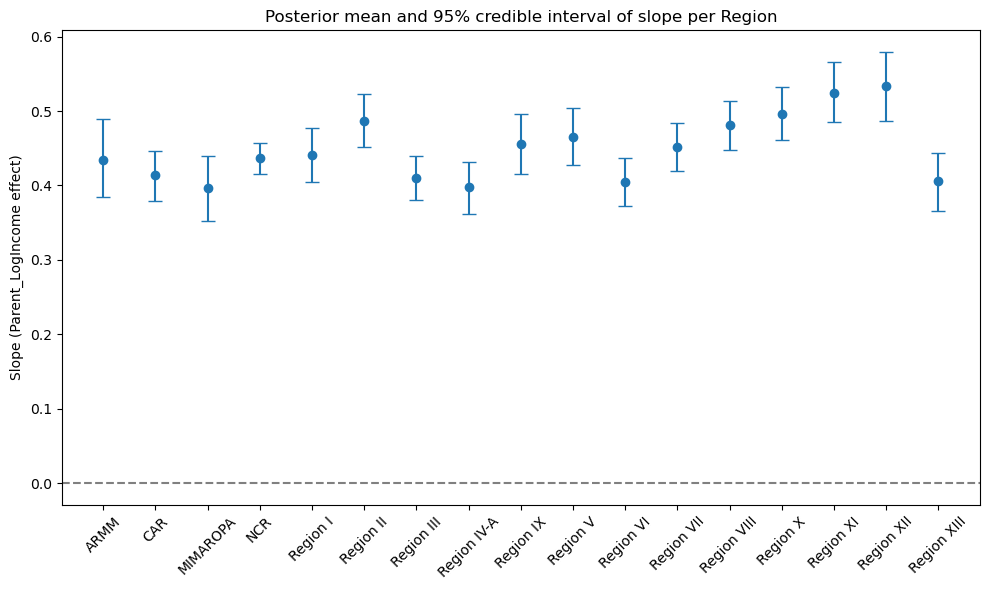

In [167]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract posterior samples for group-level slopes
idata = results  # Bambi returns an InferenceData object

# Get the names of the regions from the original data
regions = sorted(df['Region'].unique())

# Get the base (population-level) slope
base_slope = idata.posterior['Parent_LogIncome'].values  # shape (chain, draw)

# Get the group (region) specific slope offsets
# In Bambi/PyMC3, the group effect is named e.g. 'Parent_LogIncome|Region'
group_effect = idata.posterior['Parent_LogIncome|Region'].values  # shape (chain, draw, region)

# Compute the actual slope per region: population + group offset
n_chains, n_draws = base_slope.shape
n_regions = group_effect.shape[2]
region_slopes = {}

for i, region in enumerate(regions):
    # sum population-level slope and region offset at each posterior sample
    total_slope = base_slope + group_effect[:, :, i]
    total_slope = total_slope.reshape(-1)
    region_slopes[region] = total_slope

# Summarize into mean and 95% credible interval
summary = []
for region, samples in region_slopes.items():
    mean = np.mean(samples)
    hdi = az.hdi(samples, hdi_prob=0.95)
    summary.append({"Region": region, "Slope_mean": mean, "Slope_2.5%": hdi[0], "Slope_97.5%": hdi[1]})

slope_df = pd.DataFrame(summary)
print(slope_df)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    slope_df["Region"],
    slope_df["Slope_mean"],
    yerr=[slope_df["Slope_mean"] - slope_df["Slope_2.5%"], slope_df["Slope_97.5%"] - slope_df["Slope_mean"]],
    fmt='o',
    capsize=5
)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Slope (Parent_LogIncome effect)")
plt.title("Posterior mean and 95% credible interval of slope per Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-family:monospace; font-size:18px;"><b>Hierarchical Modelling - 1980-1984</b></span>

In [293]:
df_early80s = df[df['Birth_Cohort'] == '1980-1984'].copy()

In [295]:
# Specify the prior as before
priors = {
    "Parent_LogIncome": bmb.Prior("Normal", mu=0.4, sigma=0.10)
}

formula = (
    "Child_LogIncome ~ Parent_LogIncome + Children_Per_Household + C(Year) + Child_Age "
    "+ (1 + Parent_LogIncome | Region)"
)

model_early80s = bmb.Model(formula, df_early80s, family="gaussian", priors=priors)

results_early80s = model_early80s.fit(
    draws=2000, tune=2000, random_seed=42, cores=1, chains=4, target_accept=0.99
)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, Intercept, Parent_LogIncome, Children_Per_Household, C(Year), Child_Age, 1|Region_sigma, 1|Region_offset, Parent_LogIncome|Region_sigma, Parent_LogIncome|Region_offset]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 135 seconds.


         Region  Slope_mean  Slope_2.5%  Slope_97.5%
0          ARMM    0.408956    0.355232     0.461552
1           CAR    0.421473    0.376830     0.467041
2      MIMAROPA    0.418141    0.372179     0.463484
3           NCR    0.433457    0.385132     0.484692
4      Region I    0.422237    0.375284     0.468364
5     Region II    0.421173    0.375391     0.467522
6    Region III    0.420680    0.374655     0.464996
7   Region IV-A    0.423383    0.376155     0.467593
8     Region IX    0.411078    0.358810     0.459685
9      Region V    0.417043    0.369249     0.462472
10    Region VI    0.417462    0.370293     0.463783
11   Region VII    0.422075    0.376032     0.466992
12  Region VIII    0.413726    0.365667     0.462263
13     Region X    0.418214    0.372985     0.465293
14    Region XI    0.420083    0.375893     0.466913
15   Region XII    0.417135    0.368029     0.463154
16  Region XIII    0.414933    0.368707     0.462983


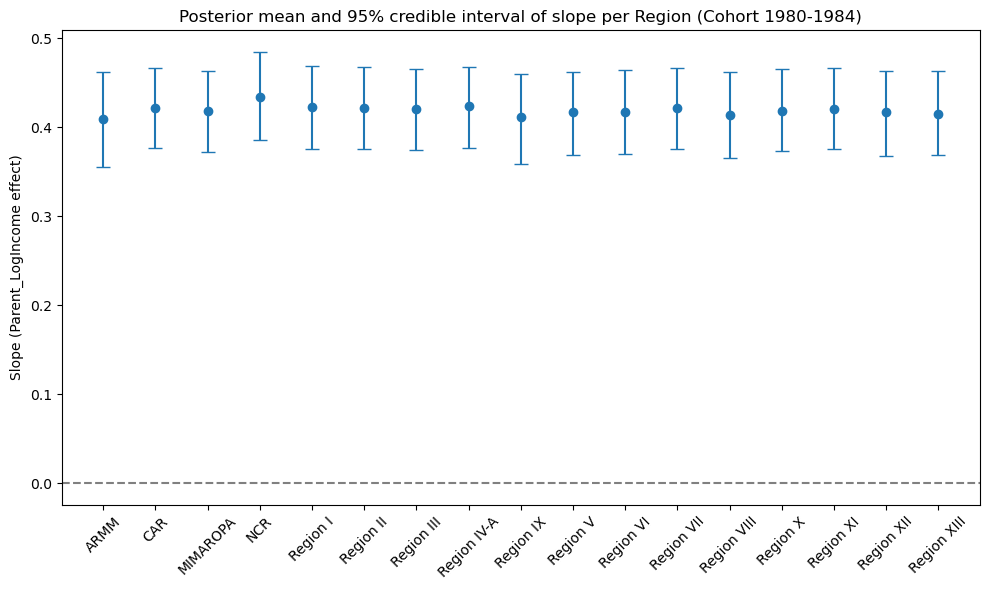

In [297]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

idata = results_early80s

regions = sorted(df_early80s['Region'].unique())
base_slope = idata.posterior['Parent_LogIncome'].values
group_effect = idata.posterior['Parent_LogIncome|Region'].values

n_chains, n_draws = base_slope.shape
n_regions = group_effect.shape[2]
region_slopes = {}

for i, region in enumerate(regions):
    total_slope = base_slope + group_effect[:, :, i]
    total_slope = total_slope.reshape(-1)
    region_slopes[region] = total_slope

summary = []
for region, samples in region_slopes.items():
    mean = np.mean(samples)
    hdi = az.hdi(samples, hdi_prob=0.95)
    summary.append({"Region": region, "Slope_mean": mean, "Slope_2.5%": hdi[0], "Slope_97.5%": hdi[1]})

slope_df_early80s = pd.DataFrame(summary)
print(slope_df_early80s)

plt.figure(figsize=(10, 6))
plt.errorbar(
    slope_df_early80s["Region"],
    slope_df_early80s["Slope_mean"],
    yerr=[slope_df_early80s["Slope_mean"] - slope_df_early80s["Slope_2.5%"], slope_df_early80s["Slope_97.5%"] - slope_df_early80s["Slope_mean"]],
    fmt='o',
    capsize=5
)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Slope (Parent_LogIncome effect)")
plt.title("Posterior mean and 95% credible interval of slope per Region (Cohort 1980-1984)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()